## Método de Simpson para integrales simples.

Este método numérico aproxima el valor de la integral a partir de sumas finitas de trapecios consecutivos generados a partir de los valores de la funcion evaluados en dos puntos especificos del intervalo dado. A diferencia del método anterior este utiliza una mejor aproximación, con una mejora de convergencia.

### Método numérico.

Para poder generar dichos trapecios haremos uso del mismo paso $h$ que dividirá el intervalo $[a,b]$ en $n$ particiones iguales, con la única diferencia que este valor deberá ser par $(2n)$; por lo que el valor de este paso estará dado por:

$$h = \frac{b-a}{2n}$$

Por lo que se tomarán nodos en x obtenidos por:

$$x_{j} = a+(j-1)\cdot h \;\;\;\; \forall j = 1,2,3,...,n+1$$

Este método igual basa su algoritmo en la generación de trapecios consecutivos, pero no realiza la suma de ellos de forma convencional. El nuevo valor de la integral será dado por:

$$I* = \left(\frac{4}{3}T_{2n} - \frac{T_n}{3}\right)$$

Desarrollando la ecuación, dejandola en función de sumatorias:

$$\int_{a}^{b} {f(x)}\;dx = \frac{h}{3}\left[ f(a) + 4\sum_{j=1}^{n}\left( f(a + (2j -1)h) \right) + 2\sum_{j=1}^{n-1}\left( f(a + (2j)h) \right) + f(b) \right] = I*$$

### Error del método

Como todo método numérico, al aproximar valores, se cometen errores con respecto a los valores reales. En el caso del método del trapecio para la aproximación de una integral simple, se comete un error que viene dado por:

$$\left|I - I*\right| \leq \frac{b-a}{180}\cdot\left|{max(f^4(x))\cdot h^4}\right|$$

### Manual de uso del programa
#### Entradas

El programa recibirá 4 parámetros ingrados por el usuario:

- $f(x)$: Recibe una función en formato númerico aceptado por python; está debe de estar simplemente en funcion de x.
- a: El límite inferior de la integral.
- b: El límite superior de la integral.
- n: Cantidad de trapecios a considerar, debe de  ser par $(2k)$.

#### Salidas
- I: El valor númerico que toma la integral de la función ingresada en el intervalo dado.
- Gráfico de los trapecios formados por la integral.

In [2]:
from sympy import *
from numpy import *
import ipywidgets as widgets
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
x = Symbol('x')
init_printing()
f_input = widgets.Text(
    placeholder='Funciona integrar',
    description='Funcion:',
    disabled=False
)
display(f_input)
display(Math('---------------------------------------------------------------'))

a_input = widgets.FloatText(
    value=0,
    description='Límite Inferior:',
    disabled=False
)

b_input = widgets.FloatText(
    value=1,
    description='Límite Superior:',
    disabled=False
)
display(a_input, b_input)

n_input = widgets.BoundedIntText(
    min=2,
    value=2,
    description='n:',
    disabled=False
)
display(Math('---------------------------------------------------------------'))
display(n_input)

Text(value='', description='Funcion:', placeholder='Funciona integrar')

<IPython.core.display.Math object>

FloatText(value=0.0, description='Límite Inferior:')

FloatText(value=1.0, description='Límite Superior:')

<IPython.core.display.Math object>

BoundedIntText(value=2, description='n:', min=2)

In [6]:
try:
    fx = sympify(f_input.value)
    li = a_input.value
    ls = b_input.value
    n = n_input.value
    
    if n % 2 != 0:
        print("\033[1;31;48m El valor de n debe de ser par.")
        raise ValueError('A very specific bad thing happened.')
    else:
        nx = int(n/2)

    h = (ls-li)/(2*nx)
except:
    print("\033[1;31;48m Error de ingreso.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

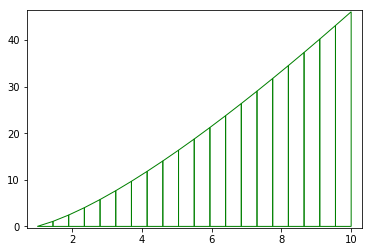

In [7]:
I = fx.subs(x,li)

#No es nx por la inclusion en funcion range()
for i in range(1,nx+1):
    I = I + (4 * (fx.subs(x,li + (((2*i)-1)*h))))

#Idem que el caso anterior
for i in range(1,nx):
    I = I + (2 * (fx.subs(x,li + ((2*i)*h))))

I = (h/3)*(I + fx.subs(x, ls))

display(Math("I = \int_{"+latex(li)+"}^{"+latex(ls)+"} "+latex(fx)+"\; dx = "+latex(I)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

lista = []

for i in range(0, (2*nx)+1):
    lista.append(fx.subs(x, li + i*h))

for i in range(0,(2*nx)):
    
    points = [[li+i*h, 0], [li+i*h, fx.subs(x,li+i*h)], [li+(i+1)*h, fx.subs(x,li+(i+1)*h)], [li+(i+1)*h, 0], [li+i*h, 0]] #the points to trace the edges.

    polygon= plt.Polygon(points,  fill=None, edgecolor='g')

    ax2.add_patch(polygon)

max_var = max(lista)
min_var = min(lista)

if min_var >= 0:
    min_var = 0
    
eps = (ls-li)/30

axes = plt.gca()
axes.set_xlim([li-eps,ls+eps])
display(Math("Representación\;Gráfica"))
axes.set_ylim([float(min_var)-eps,float(max_var)+eps])
plt.show() 